In [179]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
# tips 데이터셋 로드
tips = pd.read_csv('../csv/tips.csv')

1. 컬럼의 이름을 변경 -> [총금액, 팁, 성별, 흡연여부, 요일, 시간, 인원]
2. 총금액, 팁 컬럼의 데이터를 소수점 1자리만 두고 반올림
3. 식사 인원과 성별에 따른(그룹화) 팁의 비율의 평균 값을 구하고 그래프 시각화(바그래프)

In [181]:
tips.columns = ['총금액',
              '팁',
              '성별',
              '흡연여부',
              '요일',
              '시간',
              '인원']

In [182]:
# tips['총금액'] = tips['총금액'].round(1)
# tips['팁'] = tips['팁'].round(1)
tips[['총금액', '팁']] = tips[['총금액', '팁']].round(1)

In [183]:
tips['팁 비율'] = tips['팁'] / tips['총금액'] * 100

In [184]:
group_data = tips[['인원', '성별', '팁 비율']].groupby(['인원', '성별']).mean()

In [185]:
import platform
import matplotlib.pyplot as plt

In [186]:
# 그래프에서 깨짐 방지
if platform.system() == "Darwin":   # Mac인 경우
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgunn Gothic')

<Axes: xlabel='인원,성별'>

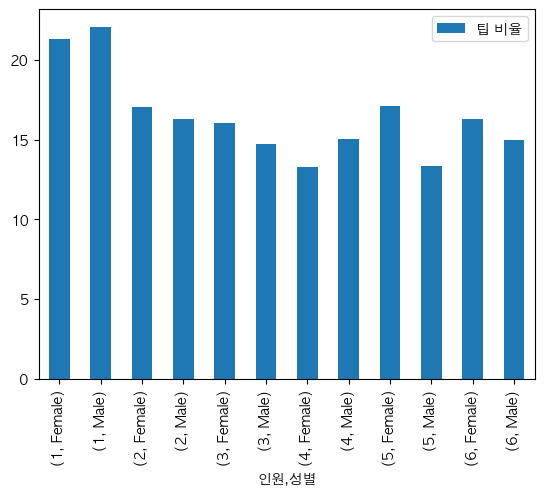

In [187]:
group_data.plot.bar()

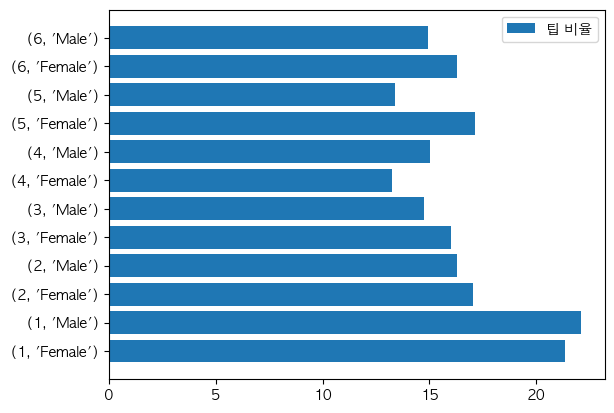

In [188]:
x = list(range(0, len(group_data.index), 1))
y = group_data['팁 비율']

plt.barh(x, y, label = '팁 비율')
plt.yticks(x, group_data.index)
plt.legend()
plt.show()

In [189]:
# 남자의 데이터프레임
# 여자의 데이터프레임으로 나눈다.
male_data = pd.DataFrame()
female_data = pd.DataFrame()

group_data.loc[(1, 'Male')]

for i in group_data.index:
    if i[1] == 'Male':
        male_data = pd.concat([male_data, group_data.loc[[i]]])
    else:
        female_data = pd.concat([female_data, group_data.loc[[i]]])

In [190]:
x = list(range(1 ,len(male_data)*2, 2))
y = male_data['팁 비율']
x2 = list(range(2, (len(female_data)+1 ,1)*2, 2))
y2 = female_data['팁 비율']
plt.bar(x, y, width= 0.4)
plt.bar(x2, y2, width= 0.4)
plt.show*()

TypeError: 'tuple' object cannot be interpreted as an integer

# Pivot table

In [193]:
pivot_data = pd.pivot_table(
    tips,
    index = '인원',
    columns= '성별',
    values = ['팁 비율'],
    aggfunc = 'mean'
)

<Axes: xlabel='인원'>

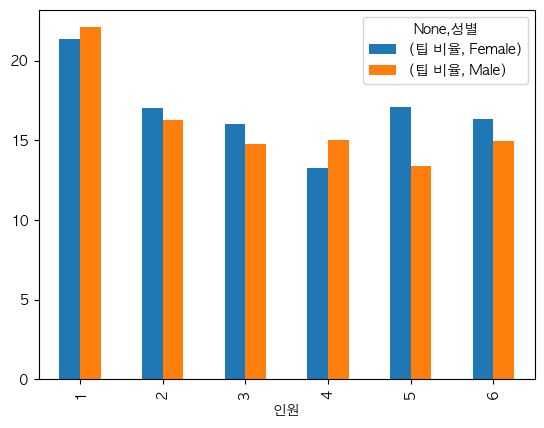

In [194]:
pivot_data.plot.bar()